# Isophotes

In order to indicate clear gradients of brightness and highlight the inner structure of the PNe isophotes will be created and overlayed on the images. Here a gaussian type image is used as a demonstration. This example can be found in the photutils section of the astropy website using the following link: https://photutils.readthedocs.io/en/stable/isophote.html.

Text(0.5, 1.0, 'Ellipse Model')

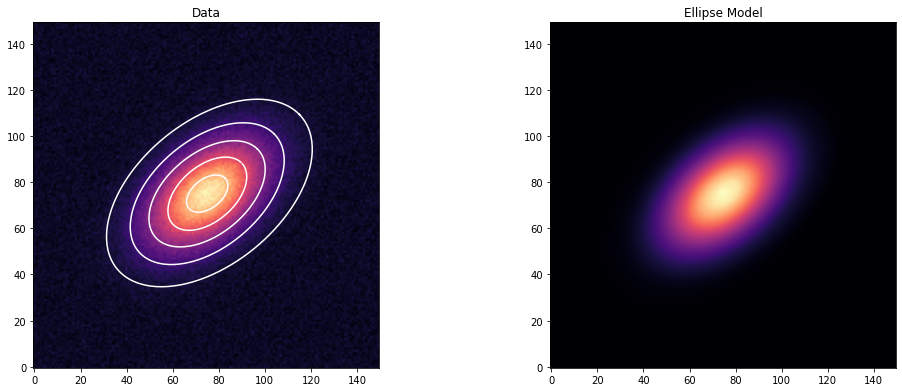

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image
from photutils.isophote import EllipseGeometry, Ellipse
from photutils.isophote import build_ellipse_model
plt.rcParams['figure.figsize'] = [15, 10]

#creation of the gaussian given max height mean values in x and y, std and angle of rotation
g = Gaussian2D(100., 75, 75, 20, 12, theta=40. * np.pi / 180.)
#grid size
ny = nx = 150
#x and y co-ords
y, x = np.mgrid[0:ny, 0:nx]
#gaussian noise generation
noise = make_noise_image((ny, nx), distribution='gaussian', mean=0., stddev=2., seed=1234)
data = g(x, y) + noise
#initial guess of ellipse giving x,y co-ords, ellispe parameters and angle of rotation
geometry = EllipseGeometry(x0=75, y0=75, sma=20, eps=0.5,
                           pa=20. * np.pi / 180.)
ellipse = Ellipse(data, geometry)
#fits the image with ellipse to get correct parameters
isolist = ellipse.fit_image()

#creating model of multiple images
model_image = build_ellipse_model(data.shape, isolist)


#plotting
fig, (ax1, ax2) = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, origin='lower',cmap = 'magma')
ax1.set_title('Data')

smas = np.linspace(10, 50, 5)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

ax2.imshow(model_image, origin='lower',cmap = 'magma')
ax2.set_title('Ellipse Model')

# Elliptical Apperture Fitting

The following is an example of the photometry to be preformed on images of the PNe. The ring nebulae i taken as an example and is fitted with an elliptical aperture.

1631.0508634178161


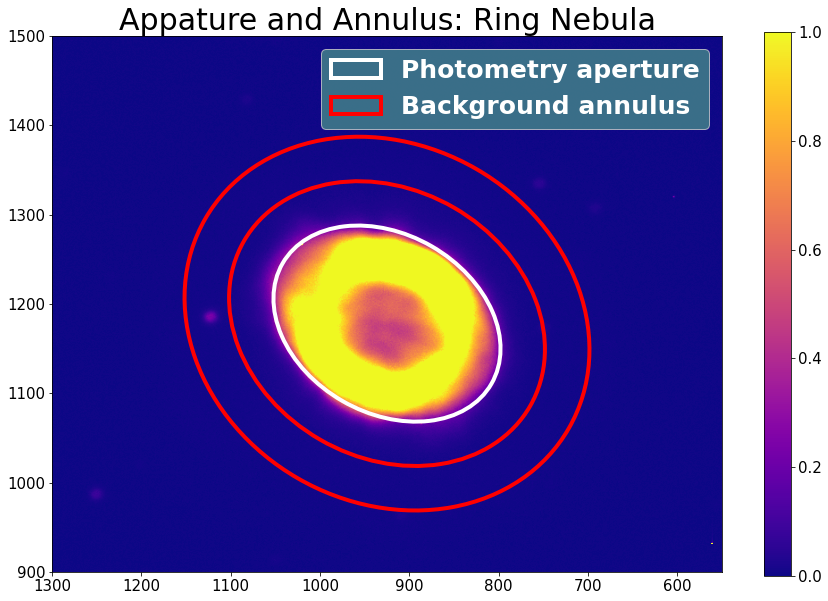

In [2]:
from astropy.io import fits
import os
from photutils.aperture import EllipticalAperture, EllipticalAnnulus

#directory
os.chdir(r'C:/Users/laura/Documents/4th year/Thesis/Rough work/ring_neb_d_new')

file = fits.open('im_1.fits')
dat_im = file[0].data
#get pice of image at center where image is brightest
center = (file[0].data[1200:1300,900:1000]).astype(float)
#get average and then dived image to normalise
av = np.mean(center)
master = dat_im/av
print(av)

#plottinng and zoom in to make image more visable
plot = plt.imshow(master, vmin = 0, vmax = 1, cmap = 'plasma')
plt.xlim(1300,550)
plt.ylim(900,1500)

#specify source position in x and y
positions = [(925, 1178)]

#define apperature and annulus positions and ellipse parameters
aperture = EllipticalAperture(positions, 135, 100, theta=np.pi/6)
annulus = EllipticalAnnulus(positions, 185, 235, 200,150, theta=np.pi/6)
ap_patches = aperture.plot(color='white', lw=4,
                           label='Photometry aperture')

#plotting the aperture and annulus
ann_patches = annulus.plot(color='red', lw=4,
                                    label='Background annulus')
handles = (ap_patches[0], ann_patches[0])
plt.title('Appature and Annulus: Ring Nebula', fontsize = 30)
plt.legend(loc= 'upper right', facecolor='#458989', labelcolor='white',
           handles=handles, prop={'weight': 'bold', 'size': 25})

cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15 )
plt.savefig('ring_app.png')
plt.show()

# Galactic Co-ordinates

To determine the galactic co-ordinates using astropys SkyCoords, the RA and DEC from the fits files must be converted into a more flexible form.

In [3]:
from astropy import units as u
from astropy.coordinates import Angle

def ra_2_deg(file):
    im = fits.open(file)
    
    #strings for ra and dec extracted from fits file
    ra_s = im[0].header['RA']
    dec_s = im[0].header['DEC']
    
    #need to get rid of : and seperate into the three values 
    #(hours min sec) for ra and dec
    ran = ra_s.replace(':', ' ')
    ra_f = [str(i) for i in ran.split()]
    decn = dec_s.replace(':', ' ')
    dec_f = [str(i) for i in decn.split()]
    
    #add to astropy angles variable and convert to degrees
    an_r = Angle( str((ra_f[0]) + 'h' + ra_f[1] + 'm' + ra_f[2]+'s'))
    ra_d = (an_r.degree)
    an_d = Angle( str((dec_f[0]) + 'd' + dec_f[1] + 'm' + dec_f[2]+'s'))
    dec_d = (an_d.degree)
    
    return ra_d, dec_d, ra_s,dec_s
    
#images loaded and function performed    
x = ra_2_deg('im_2.fits')  
print('Origional:','RA =',x[2],'DEC =',x[3])
print('New (degrees):','RA =',x[0],'DEC =',x[1])

Origional: RA = 18:54:08 DEC = +33:03:03
New (degrees): RA = 283.5333333333333 DEC = 33.05083333333333


Now that the values are in degrees we can use SkyCoord to convert between co-ordinate systems

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord

#the frame icrs is for RA and DEC
co = SkyCoord(ra=x[0]*u.degree, dec=x[1]*u.degree, frame='icrs')
gal = SkyCoord.to_string(co.galactic)
gal_f = [float(i) for i in gal.split()]

print('The Galactic co-ordinates of the Ring Nebula are longditude is',gal_f[0],' degrees and latititude is',gal_f[1],'degrees')

The Galactic co-ordinates of the Ring Nebula are longditude is 63.2378  degrees and latititude is 13.8814 degrees
